# Praca domowa nr 8

- Dane to tej pracy domowej to lista top 5000 albumów muzycznych wg portalu [rateyourmusic.com](https://rateyourmusic.com). Dataset wraz z opisem można znaleźć na [Kaggle'u](https://www.kaggle.com/datasets/michaelbryantds/top-5000-albums-of-all-time-rateyourmusiccom). 
- Dane znajdują się też w katalogu z pracą domową - nazwa pliku to `rym_top5000.csv`.  

## Zadanie 1 - `numpy` + `pandas` (2 pkt)
Używając funkcji z pakietów `numpy` oraz `pandas` odpowiedz na poniższe pytania dotyczące zbioru danych o albumach muzycznych.

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("rym_top5000.csv")

In [22]:
df.head()

,Ranking,Album,Artist Name,Release Date,Genres,Descriptors,Average Rating,Number of Ratings,Number of Reviews
0,1.0,OK Computer,Radiohead,16 June 1997,"Alternative Rock, Art Rock","melancholic, anxious, futuristic, alienation, ...",4.23,"70,382",1531
1,2.0,Wish You Were Here,Pink Floyd,12 September 1975,"Progressive Rock, Art Rock","melancholic, atmospheric, progressive, male vo...",4.29,"48,662",983
2,3.0,In the Court of the Crimson King,King Crimson,10 October 1969,"Progressive Rock, Art Rock","fantasy, epic, progressive, philosophical, com...",4.30,"44,943",870
3,4.0,Kid A,Radiohead,3 October 2000,"Art Rock, Experimental Rock, Electronic","cold, melancholic, futuristic, atmospheric, an...",4.21,"58,590",734
4,5.0,To Pimp a Butterfly,Kendrick Lamar,15 March 2015,"Conscious Hip Hop, West Coast Hip Hop, Jazz Rap","political, conscious, poetic, protest, concept...",4.27,"44,206",379


#### Jacy artyści z ponad 5 albumami na liście mają największą medianę ocen dla swoich albumów? Podaj top 10.

In [17]:
aggregated = df.groupby("Artist Name").agg(albumNo=('Album', 'count'), mediana=('Average Rating', 'median')).reset_index()

aggregated.loc[aggregated.albumNo > 5].sort_values("mediana", ascending = False).head(10).reset_index(drop = True)

,Artist Name,albumNo,mediana
0,David Bowie,8,4.050
1,The Beatles,10,4.045
2,King Crimson,7,3.970
3,The Rolling Stones,6,3.965
4,Black Sabbath,8,3.950
5,Led Zeppelin,6,3.940
6,Pink Floyd,8,3.910
7,Death,6,3.905
8,John Coltrane,14,3.905
9,Bob Dylan,11,3.890


#### Jacy artyści mają największą różnicę między najgorszym i najlepszym średnim ratingiem dla swojego albumu? Podaj top 10  oraz najwyższą i najniższą ocenę dla każdego z tych artystów. 

In [18]:
ratings = df.groupby("Artist Name")["Average Rating"].agg(["min", "max"]).reset_index(drop = True)
ratings["difference"] = ratings["max"] - ratings["min"]
ratings.sort_values(by = "difference", ascending = False).head(10)

,min,max,difference
Artist Name,,,
Kendrick Lamar,3.52,4.27,0.75
The Beatles,3.55,4.25,0.70
Pink Floyd,3.60,4.29,0.69
My Bloody Valentine,3.58,4.24,0.66
King Crimson,3.67,4.30,0.63
John Coltrane,3.70,4.30,0.60
Radiohead,3.66,4.23,0.57
Miles Davis,3.69,4.23,0.54
The Cure,3.63,4.17,0.54


#### Podaj top 10 albumów o największym stosunku liczby ocen do liczby recenzji. Weź pod uwagę tylko albumy o przynajmniej 5000 ocenach i 15 recenzjach.

In [ ]:
df["Number of Ratings"] = df["Number of Ratings"].transform(lambda value: int(value.replace(',', '')))

In [70]:
df_filtered = df.loc[(df["Number of Reviews"] >= 15) & (df["Number of Ratings"] >= 5000)]
df_filtered["ratio"] =  df_filtered["Number of Ratings"]/df_filtered["Number of Reviews"]
df_filtered.sort_values("ratio", ascending = False)[["Album", "ratio"]].head(10).reset_index(drop = True)

C:\Users\wojte\AppData\Local\Temp\ipykernel_15528\1945592403.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["ratio"] =  df_filtered["Number of Ratings"]/df_filtered["Number of Reviews"]


,Album,ratio
0,Jenny Death: The Powers That B Disc 2,361.833333
1,Bury Me at Makeout Creek,308.210526
2,春と修羅 (Haru to Shura),272.913043
3,Saturation,251.842857
4,Saturation III,251.735294
5,Scenery,248.666667
6,Endless,228.487179
7,Imperial,225.420000
8,Saturation II,215.552941
9,Bottomless Pit,202.098039


#### Z których lat pochodzi najwięcej albumów na liście najpopularniejszych wśród krytyków i najpopularniejszych wśród oceniających? 
a) Podaj 5 lat, w których wydano najwięcej albumów z listy mających liczbę recenzji większą niż Q3 (trzeci kwartyl).

b) Podaj 5 lat, w których wydano najwięcej albumów z listy mających liczbę ocen większą niż Q3 (trzeci kwartyl).


In [66]:
gQ3 = df.loc[df["Number of Reviews"] > np.percentile(df["Number of Reviews"], 75)]
gQ3["Release Date"] = gQ3["Release Date"].str[-4:]
gQ3.groupby("Release Date").size().reset_index().sort_values(0, ascending = False).head(5).rename(columns={0: "Liczba"}).reset_index(drop=True)

C:\Users\wojte\AppData\Local\Temp\ipykernel_15528\943682317.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gQ3["Release Date"] = gQ3["Release Date"].str[-4:]


,Release Date,Liczba
0,1970,43
1,1971,41
2,1969,38
3,1994,36
4,1995,34


In [68]:
gQ3 = df.loc[df["Number of Ratings"] > np.percentile(df["Number of Ratings"], 75)]
gQ3["Release Date"] = gQ3["Release Date"].str[-4:]
gQ3.groupby("Release Date").size().reset_index().sort_values(0, ascending = False).head(5).rename(columns={0: "Liczba"}).reset_index(drop=True)

C:\Users\wojte\AppData\Local\Temp\ipykernel_15528\4292029413.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gQ3["Release Date"] = gQ3["Release Date"].str[-4:]


,Release Date,Liczba
0,1994,41
1,1971,36
2,1970,35
3,1996,34
4,1995,33


## Zadanie 2 - wizualizacja (3 pkt)
- Za pomocą pakietów `matplotlib` i `seaborn` stwórz dwa wykresy. 
- Wykorzystaj funkcję `matplotlib.pyplot.subplots`, by umieścić je we wspólnej figurze. 
- Jeden z wykresów ma opierać się na wynikach z zadania 1 - wizualizować odpowiedź na wybrane pytanie. 
- Drugi wykres może mieć dowolną tematykę, ale ma być powiązany z wcześniejszym, tak by figura mogła mieć wspólny tytuł.

In [83]:
aggregated = df.groupby("Artist Name").agg(albumNo=('Album', 'count'), Median=('Average Rating', 'median')).reset_index()
res1=aggregated.loc[aggregated.albumNo > 5].sort_values("Median", ascending = False).head(10).reset_index(drop = True).rename(columns={"Artist Name": "Name"})
res2=aggregated.loc[aggregated.albumNo > 5].sort_values("Median", ascending = True).head(10).reset_index(drop = True).rename(columns={"Artist Name": "Name"})

Text(0.5, 0.98, "Artists with best and worst rating's median")

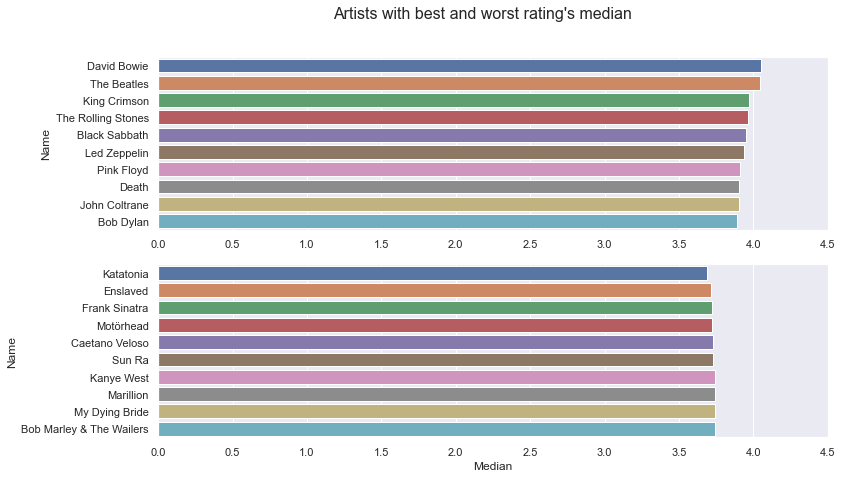

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ox = plt.subplots(2)
ox[0].set_xlim(0,4.5)
ox[1].set_xlim(0,4.5)
sns.barplot(ax=ox[0], x = res1.Median,  y = res1.Name).set(xlabel=None)
sns.barplot(ax=ox[1], x = res2.Median, y = res2.Name)
 
fig.suptitle("Artists with best and worst rating's median", fontsize = 16)

## * Zadanie 3 - bonusowe (1 pkt)

Zapisz wygenerowaną figurę do formatu `.pgf` i załącz w raporcie wygenerowanym w `LaTeX` tak, by na wykresie zawierał się klikalny link do strony `www.rateyourmusic.com` (np. w tytule) - można zrobić to ręcznie, edytując zapisany plik `.pgf`. Przykład w katalogu z pracą domową w pliku `pgf_example.pdf` (klikalny tytuł i elementy legendy).  

Załącz w rozwiązaniu wygenerowany plik `pdf`. 